# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

In todays world global warming is the main problem and we address this problem by research questions.

My Research questions are 
1)Identify the trend in temperature  over the time of 22 years
2) Identify the trend in  Carbon monoxide  over the  22 years period 

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1st data gathering and loading method

############################## First DataSet #########################################
# Seoul Weather Data load from url
# url return a zip file containing csv files

import requests as req
import zipfile as zf
from io import BytesIO 

url =  'https://www.kaggle.com/api/v1/datasets/download/alfredkondoro/seoul-historical-weather-data-2024'
response = req.get(url)

with zf.ZipFile(BytesIO(response.content)) as z:
    file_list = z.namelist()
   # print('files in zip =', file_list )

    csv_files = [ f  for f in file_list if f.endswith('.csv') ]

    count=len(csv_files)
    raw_df_wd = pd.DataFrame()
    i=0;
    
    while count > 0 :
        count= count -1
        if csv_files:
            with z.open(csv_files[i]) as f:
                temp_df = pd.read_csv(f)
                raw_df_wd = pd.concat([raw_df_wd , temp_df] , ignore_index = True)
                i =i+1
        else:
            print("No CSV files found.")


In [3]:

inprocess_df_wd=raw_df_wd

In [4]:
inprocess_df_wd.sort_values(by='datetime', ascending= False).head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
10971,seoul,2024-01-01,7.3,-0.2,3.0,6.6,-2.8,1.7,0.5,84.7,...,8.6,5.0,10.0,2024-01-01T07:46:50,2024-01-01T17:23:42,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
10970,seoul,2023-12-31,4.4,0.8,2.3,3.1,-1.8,0.4,1.5,94.7,...,4.5,4.0,10.0,2023-12-31T07:46:38,2023-12-31T17:22:57,0.63,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"47111099999,47098099999,47112099999,4711909999..."
10969,seoul,2023-12-30,1.9,-0.9,0.5,-1.2,-3.5,-2.4,-1.0,90.1,...,1.8,1.0,10.0,2023-12-30T07:46:24,2023-12-30T17:22:12,0.60,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,snow,"47111099999,47098099999,47112099999,4711909999..."
10968,seoul,2023-12-29,4.5,-1.4,1.5,3.0,-3.5,-0.1,-3.3,70.2,...,8.8,4.0,10.0,2023-12-29T07:46:08,2023-12-29T17:21:29,0.57,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."
10967,seoul,2023-12-28,4.1,-1.7,1.1,2.4,-3.4,0.0,-3.7,71.5,...,9.6,5.0,10.0,2023-12-28T07:45:50,2023-12-28T17:20:48,0.54,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47098099999,47112099999,4711909999..."


In [5]:
inprocess_df_wd.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,NaN,NaN,NaN,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,NaN,NaN,NaN,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,NaN,NaN,NaN,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999..."
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,NaN,NaN,NaN,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999..."


#### Dataset 2

In [6]:
#2nd data gathering and loading method


############################### Second Dataset ######################
### Air Pollution Dataset

raw_df_pd = pd.read_csv('seoul_air_1988_2021.csv')
raw_df_pd.head(5)


,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [7]:
#Optional: store the raw data in your local data store

In [8]:
inprocess_df_pd=raw_df_pd

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [9]:
# Weather Dataset
# you can see the columns have missing values after the execution of above command

inprocess_df_wd.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,NaN,NaN,NaN,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,NaN,NaN,NaN,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,NaN,NaN,NaN,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999..."
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,NaN,NaN,NaN,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999..."


In [10]:
# Inspecting the dataframe programmatically
# After executing the following command. you will see the total number of null values in each column

inprocess_df_wd.isnull().sum()

name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype           6923
snow                 2926
snowdepth            2717
windgust             7325
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation       5851
solarenergy          5851
uvindex              5851
severerisk          10250
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
dtype: int64

### Quality Issue 2:

In [11]:
# Inspecting the dataframe visually
# dupilcate values

inprocess_df_wd[
    (inprocess_df_wd['tempmax'].round(1) == 35.2) & 
    (inprocess_df_wd['tempmin'].round(1) == 16.4) & 
    (inprocess_df_wd['temp'].round(1) == 26.3)
]


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."


In [12]:
# - Inspecting the dataframe programmatically

inprocess_df_wd.duplicated().sum()

3

### Tidiness Issue 1:

In [13]:
# Inspecting the dataframe visually
# After the execution 
# you can see the multiple values stored  are stored in one column name station

inprocess_df_wd.head(5)


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,seoul,1994-01-01,35.2,16.4,26.3,33.4,13.0,24.3,15.5,65.9,...,NaN,NaN,NaN,1994-01-01T07:46:54,1994-01-01T17:23:56,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
1,seoul,1994-01-02,43.0,31.5,36.2,39.4,26.7,32.6,27.9,72.1,...,NaN,NaN,NaN,1994-01-02T07:47:03,1994-01-02T17:24:44,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
2,seoul,1994-01-03,47.9,30.9,38.0,44.7,24.5,35.4,27.3,68.1,...,NaN,NaN,NaN,1994-01-03T07:47:11,1994-01-03T17:25:33,0.68,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"47111099999,47112099999,47120099999,4711009999..."
3,seoul,1994-01-04,38.8,22.1,30.1,32.0,18.4,26.3,13.6,51.2,...,NaN,NaN,NaN,1994-01-04T07:47:16,1994-01-04T17:26:23,0.72,Clear,Clear conditions throughout the day.,clear-day,"47111099999,47112099999,47120099999,4711009999..."
4,seoul,1994-01-05,40.0,24.0,33.1,40.0,18.5,31.0,21.7,63.9,...,NaN,NaN,NaN,1994-01-05T07:47:19,1994-01-05T17:27:14,0.75,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"47111099999,47112099999,47120099999,4711009999..."


In [14]:
# Inspecting the dataframe programmatically
inprocess_df_wd['stations']


0        47111099999,47112099999,47120099999,4711009999...
1        47111099999,47112099999,47120099999,4711009999...
2        47111099999,47112099999,47120099999,4711009999...
3        47111099999,47112099999,47120099999,4711009999...
4        47111099999,47112099999,47120099999,4711009999...
                               ...                        
10967    47111099999,47098099999,47112099999,4711909999...
10968    47111099999,47098099999,47112099999,4711909999...
10969    47111099999,47098099999,47112099999,4711909999...
10970    47111099999,47098099999,47112099999,4711909999...
10971    47111099999,47098099999,47112099999,4711909999...
Name: stations, Length: 10972, dtype: object

### Tidiness Issue 2: 

In [15]:
# Inspecting the dataframe visually
# After the execution of  command , you will see the datatype of the columns are object instead of datatime

inprocess_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10972 non-null  object 
 1   datetime          10972 non-null  object 
 2   tempmax           10972 non-null  float64
 3   tempmin           10972 non-null  float64
 4   temp              10972 non-null  float64
 5   feelslikemax      10972 non-null  float64
 6   feelslikemin      10972 non-null  float64
 7   feelslike         10972 non-null  float64
 8   dew               10972 non-null  float64
 9   humidity          10972 non-null  float64
 10  precip            10972 non-null  float64
 11  precipprob        10972 non-null  int64  
 12  precipcover       10972 non-null  float64
 13  preciptype        4049 non-null   object 
 14  snow              8046 non-null   float64
 15  snowdepth         8255 non-null   float64
 16  windgust          3647 non-null   float6

In [16]:
# Inspecting the dataframe programmatically

print(inprocess_df_wd['sunrise'].dtype)
print(inprocess_df_wd['sunset'].dtype)
print(inprocess_df_wd['datetime'].dtype)

# After the execution of above command , you will see the datatype of the columns are object instead of datatime

object
object
object


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [17]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

cleaning_df_wd = inprocess_df_wd
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10972 non-null  object 
 1   datetime          10972 non-null  object 
 2   tempmax           10972 non-null  float64
 3   tempmin           10972 non-null  float64
 4   temp              10972 non-null  float64
 5   feelslikemax      10972 non-null  float64
 6   feelslikemin      10972 non-null  float64
 7   feelslike         10972 non-null  float64
 8   dew               10972 non-null  float64
 9   humidity          10972 non-null  float64
 10  precip            10972 non-null  float64
 11  precipprob        10972 non-null  int64  
 12  precipcover       10972 non-null  float64
 13  preciptype        4049 non-null   object 
 14  snow              8046 non-null   float64
 15  snowdepth         8255 non-null   float64
 16  windgust          3647 non-null   float6

### **Quality Issue 1:**

In [18]:
# Apply the cleaning strategy
# no need of following variables/columns  for analysis
# Also the you can see the null values count

# column name        null values count
# preciptype           7395
# snow                10965
# snowdepth           10665
# windgust            10965
# solarradiation      10965
# solarenergy         10965
# uvindex             10965
# severerisk          10965



cleaning_df_wd.drop(['preciptype', 'snow' , 'snowdepth', 'windgust', 'solarradiation', 'solarenergy', 'uvindex' , 'severerisk' ] , axis=1 , inplace=True )
cleaning_df_wd.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10972 non-null  object 
 1   datetime          10972 non-null  object 
 2   tempmax           10972 non-null  float64
 3   tempmin           10972 non-null  float64
 4   temp              10972 non-null  float64
 5   feelslikemax      10972 non-null  float64
 6   feelslikemin      10972 non-null  float64
 7   feelslike         10972 non-null  float64
 8   dew               10972 non-null  float64
 9   humidity          10972 non-null  float64
 10  precip            10972 non-null  float64
 11  precipprob        10972 non-null  int64  
 12  precipcover       10972 non-null  float64
 13  windspeed         10972 non-null  float64
 14  winddir           10972 non-null  float64
 15  sealevelpressure  10972 non-null  float64
 16  cloudcover        10972 non-null  float6

In [19]:
# Validate the cleaning was successful
# now there is no missing values
cleaning_df_wd.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

### **Quality Issue 2: **

In [20]:
# Apply the cleaning strategy
#  After the execution of following command , you can see the total number of duplicates

cleaning_df_wd.drop_duplicates(inplace=True)
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10968 entries, 0 to 10971
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10968 non-null  object 
 1   datetime          10968 non-null  object 
 2   tempmax           10968 non-null  float64
 3   tempmin           10968 non-null  float64
 4   temp              10968 non-null  float64
 5   feelslikemax      10968 non-null  float64
 6   feelslikemin      10968 non-null  float64
 7   feelslike         10968 non-null  float64
 8   dew               10968 non-null  float64
 9   humidity          10968 non-null  float64
 10  precip            10968 non-null  float64
 11  precipprob        10968 non-null  int64  
 12  precipcover       10968 non-null  float64
 13  windspeed         10968 non-null  float64
 14  winddir           10968 non-null  float64
 15  sealevelpressure  10968 non-null  float64
 16  cloudcover        10968 non-null  float64
 17

In [21]:
#Validate the cleaning was successful


cleaning_df_wd.duplicated().sum() 

0

### **Tidiness Issue 1: **

In [22]:
# Apply the cleaning strategy

cleaning_df_wd.drop('stations' , axis=1 , inplace=True)

In [23]:
# Validate the cleaning was successful
# no need of the following column


cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10968 entries, 0 to 10971
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10968 non-null  object 
 1   datetime          10968 non-null  object 
 2   tempmax           10968 non-null  float64
 3   tempmin           10968 non-null  float64
 4   temp              10968 non-null  float64
 5   feelslikemax      10968 non-null  float64
 6   feelslikemin      10968 non-null  float64
 7   feelslike         10968 non-null  float64
 8   dew               10968 non-null  float64
 9   humidity          10968 non-null  float64
 10  precip            10968 non-null  float64
 11  precipprob        10968 non-null  int64  
 12  precipcover       10968 non-null  float64
 13  windspeed         10968 non-null  float64
 14  winddir           10968 non-null  float64
 15  sealevelpressure  10968 non-null  float64
 16  cloudcover        10968 non-null  float64
 17

### **Tidiness Issue 2: **

In [24]:
# Apply the cleaning strategy

cleaning_df_wd['sunrise'] = pd.to_datetime(cleaning_df_wd['sunrise']) ;
cleaning_df_wd['sunset'] = pd.to_datetime(cleaning_df_wd['sunset']) ;
cleaning_df_wd['datetime'] = pd.to_datetime(cleaning_df_wd['datetime']) ;



In [25]:
# Validate the cleaning was successful
# changing the data type 


print(cleaning_df_wd['sunrise'].dtype)
print(cleaning_df_wd['sunset'].dtype)
print(cleaning_df_wd['datetime'].dtype)


datetime64[ns]
datetime64[ns]
datetime64[ns]


In [26]:
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10968 entries, 0 to 10971
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              10968 non-null  object        
 1   datetime          10968 non-null  datetime64[ns]
 2   tempmax           10968 non-null  float64       
 3   tempmin           10968 non-null  float64       
 4   temp              10968 non-null  float64       
 5   feelslikemax      10968 non-null  float64       
 6   feelslikemin      10968 non-null  float64       
 7   feelslike         10968 non-null  float64       
 8   dew               10968 non-null  float64       
 9   humidity          10968 non-null  float64       
 10  precip            10968 non-null  float64       
 11  precipprob        10968 non-null  int64         
 12  precipcover       10968 non-null  float64       
 13  windspeed         10968 non-null  float64       
 14  winddir           10968 non

### **Dataset 2 - Air Polution**
resolve cleaning and tideness issues

In [27]:
# show only 5 rows 

cleaning_df_pd= inprocess_df_pd
cleaning_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988010100,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988010100,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988010100,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988010100,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988010100,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN


In [28]:
cleaning_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984782 entries, 0 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dt      int64  
 1   loc     int64  
 2   lat     float64
 3   long    float64
 4   so2     float64
 5   no2     float64
 6   co      float64
 7   o3      float64
 8   pm10    float64
 9   pm2.5   float64
dtypes: float64(8), int64(2)
memory usage: 456.6 MB


In [29]:
cleaning_df_pd.isna().sum()

dt             0
loc            0
lat            0
long           0
so2       117565
no2       128616
co        161948
o3        108206
pm10      947434
pm2.5    2228730
dtype: int64

In [30]:
# Removing last two digit in date column because we don't need them
cleaning_df_pd['dt'] =cleaning_df_pd['dt'].astype(str).str[:8]
cleaning_df_pd

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,19880101,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,19880101,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,19880101,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,19880101,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,19880101,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5984777,20211231,121,37.487359,126.924913,0.003,0.027,0.5,0.016,21.0,9.0
5984778,20211231,122,37.504547,126.992308,0.003,0.021,0.4,0.023,16.0,10.0
5984779,20211231,123,37.517546,127.045775,0.003,0.019,0.4,0.024,18.0,6.0
5984780,20211231,124,37.502688,127.090327,0.003,0.025,0.5,0.020,21.0,8.0


In [31]:
# converting to datetime

cleaning_df_pd['dt'] =pd.to_datetime(cleaning_df_pd['dt'])

In [32]:
cleaning_df_pd

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,1988-01-01,103,37.540037,127.002661,NaN,0.007,10.3,0.000,NaN,NaN
1,1988-01-01,105,37.593730,126.947561,0.340,0.055,12.6,0.043,NaN,NaN
2,1988-01-01,107,37.542043,127.047497,0.399,0.046,13.4,NaN,NaN,NaN
3,1988-01-01,108,37.547185,127.090304,0.261,0.034,5.4,0.000,NaN,NaN
4,1988-01-01,113,37.654140,127.026801,0.443,0.039,14.6,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5984777,2021-12-31,121,37.487359,126.924913,0.003,0.027,0.5,0.016,21.0,9.0
5984778,2021-12-31,122,37.504547,126.992308,0.003,0.021,0.4,0.023,16.0,10.0
5984779,2021-12-31,123,37.517546,127.045775,0.003,0.019,0.4,0.024,18.0,6.0
5984780,2021-12-31,124,37.502688,127.090327,0.003,0.025,0.5,0.020,21.0,8.0


In [33]:
cleaning_df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5984782 entries, 0 to 5984781
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   dt      datetime64[ns]
 1   loc     int64         
 2   lat     float64       
 3   long    float64       
 4   so2     float64       
 5   no2     float64       
 6   co      float64       
 7   o3      float64       
 8   pm10    float64       
 9   pm2.5   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 456.6 MB


In [34]:
cleaning_df_pd.isna().sum()

dt             0
loc            0
lat            0
long           0
so2       117565
no2       128616
co        161948
o3        108206
pm10      947434
pm2.5    2228730
dtype: int64

In [35]:
cleaning_df_pd =cleaning_df_pd.drop_duplicates()

In [36]:
cleaning_df_pd.duplicated().sum()

0

In [37]:
cleaning_df_pd = cleaning_df_pd.dropna()

In [38]:
cleaning_df_pd.isna().sum()

dt       0
loc      0
lat      0
long     0
so2      0
no2      0
co       0
o3       0
pm10     0
pm2.5    0
dtype: int64

In [39]:
# there are multiple locations , removing all location except 103 to align the date column with another dataset

cleaning_df_pd = cleaning_df_pd[ cleaning_df_pd['loc'] == 103 ]

In [40]:
cleaning_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1627649,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1627674,2001-08-08,103,37.540037,127.002661,0.003,0.034,0.2,0.024,43.0,21.0
1627699,2001-08-08,103,37.540037,127.002661,0.003,0.028,0.2,0.018,36.0,20.0
1627724,2001-08-08,103,37.540037,127.002661,0.003,0.031,0.3,0.014,38.0,20.0
1627749,2001-08-08,103,37.540037,127.002661,0.004,0.035,0.3,0.013,35.0,16.0


In [41]:
# removing duplicates 
cleaning_df_pd.drop_duplicates(subset=['dt', 'loc', 'lat', 'long'], keep='first', inplace=True)

In [42]:
cleaning_df_pd.sort_values(by='dt' , ascending=True ).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1627649,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1627849,2001-08-09,103,37.540037,127.002661,0.004,0.026,0.2,0.014,41.0,18.0
1628448,2001-08-10,103,37.540037,127.002661,0.003,0.039,0.2,0.003,57.0,37.0
1629047,2001-08-11,103,37.540037,127.002661,0.004,0.060,0.3,0.003,70.0,47.0
1629645,2001-08-12,103,37.540037,127.002661,0.003,0.031,0.2,0.007,33.0,15.0


In [43]:
cleaning_df_pd.sort_values(by='dt' , ascending=False ).head(2)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
5984185,2021-12-31,103,37.540037,127.002661,0.003,0.009,0.3,0.028,22.0,12.0
5983589,2021-12-30,103,37.540037,127.002661,0.004,0.016,0.4,0.019,37.0,20.0


In [44]:
row_count = len(cleaning_df_pd)
row_count

7082

In [45]:
cleaning_df_pd.sort_values(by='dt', ascending=True).head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
1627649,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1627849,2001-08-09,103,37.540037,127.002661,0.004,0.026,0.2,0.014,41.0,18.0
1628448,2001-08-10,103,37.540037,127.002661,0.003,0.039,0.2,0.003,57.0,37.0
1629047,2001-08-11,103,37.540037,127.002661,0.004,0.060,0.3,0.003,70.0,47.0
1629645,2001-08-12,103,37.540037,127.002661,0.003,0.031,0.2,0.007,33.0,15.0


In [46]:
cleaning_df_pd = cleaning_df_pd.groupby( (cleaning_df_pd['dt']).dt.to_period('M')).first().reset_index(drop=True)
cleaning_df_pd.head(5)

,dt,loc,lat,long,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,103,37.540037,127.002661,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,103,37.540037,127.002661,0.004,0.024,0.2,0.026,65.0,48.0
2,2001-10-01,103,37.540037,127.002661,0.004,0.023,0.3,0.006,18.0,9.0
3,2001-11-01,103,37.540037,127.002661,0.003,0.014,0.3,0.022,33.0,19.0
4,2001-12-01,103,37.540037,127.002661,0.003,0.031,0.3,0.013,33.0,10.0


In [47]:
row_count = len(cleaning_df_pd)
row_count 


243

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [48]:
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10968 entries, 0 to 10971
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              10968 non-null  object        
 1   datetime          10968 non-null  datetime64[ns]
 2   tempmax           10968 non-null  float64       
 3   tempmin           10968 non-null  float64       
 4   temp              10968 non-null  float64       
 5   feelslikemax      10968 non-null  float64       
 6   feelslikemin      10968 non-null  float64       
 7   feelslike         10968 non-null  float64       
 8   dew               10968 non-null  float64       
 9   humidity          10968 non-null  float64       
 10  precip            10968 non-null  float64       
 11  precipprob        10968 non-null  int64         
 12  precipcover       10968 non-null  float64       
 13  windspeed         10968 non-null  float64       
 14  winddir           10968 non

In [49]:
#  filtering out columns so that we have only columns that we need in the weather data
cleaning_df_wd = cleaning_df_wd[['name' , 'datetime' , 'temp']] 
cleaning_df_wd.head(5)


,name,datetime,temp
0,seoul,1994-01-01,26.3
1,seoul,1994-01-02,36.2
2,seoul,1994-01-03,38.0
3,seoul,1994-01-04,30.1
4,seoul,1994-01-05,33.1


In [50]:
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10968 entries, 0 to 10971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      10968 non-null  object        
 1   datetime  10968 non-null  datetime64[ns]
 2   temp      10968 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 342.8+ KB


In [51]:
cleaning_df_wd =cleaning_df_wd.rename(columns={'datetime':'date'} )
cleaning_df_wd.head(2)

,name,date,temp
0,seoul,1994-01-01,26.3
1,seoul,1994-01-02,36.2


In [52]:
# Sort by date just in case
cleaning_df_wd = cleaning_df_wd.sort_values('date', ascending= True)

In [53]:
cleaning_df_wd = cleaning_df_wd.groupby(cleaning_df_wd['date'].dt.to_period('M')).first().reset_index(drop=True)

In [54]:
#
cleaning_df_wd.head(3)


,name,date,temp
0,seoul,1994-01-01,26.3
1,seoul,1994-02-01,32.8
2,seoul,1994-03-01,30.0


In [55]:
# We have Air pollution data from 2001-8-8 to 2021-12-31
# Filtering the weather data 

cleaning_df_wd = cleaning_df_wd[ ( cleaning_df_wd['date'].dt.year >= 2001 ) & ( cleaning_df_wd['date'].dt.year <= 2021 )]
cleaning_df_wd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 84 to 335
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    252 non-null    object        
 1   date    252 non-null    datetime64[ns]
 2   temp    252 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.9+ KB


In [56]:
#  starting date in the weather data 2001-01-01
cleaning_df_wd.sort_values( by='date', ascending=True).head(2)

,name,date,temp
84,seoul,2001-01-01,22.2
85,seoul,2001-02-01,21.8


In [57]:
cleaning_df_wd = cleaning_df_wd[cleaning_df_wd['date'] >= '2001-08-01']

In [58]:
#  last date in the weather data 2021-11-01
cleaning_df_wd.sort_values( by='date', ascending=True).head(5)

,name,date,temp
91,seoul,2001-08-01,81.7
92,seoul,2001-09-01,77.3
93,seoul,2001-10-01,59.4
94,seoul,2001-11-01,54.7
95,seoul,2001-12-01,36.0


In [59]:
cleaning_df_wd['date'] = cleaning_df_wd['date'].dt.strftime('%Y-%m')

In [60]:
cleaning_df_wd.sort_values( by='date', ascending=True).head(5)

,name,date,temp
91,seoul,2001-08,81.7
92,seoul,2001-09,77.3
93,seoul,2001-10,59.4
94,seoul,2001-11,54.7
95,seoul,2001-12,36.0


In [61]:
row_count= len(cleaning_df_wd)
print('total rows in weather data =',row_count)

total rows in weather data = 245


In [62]:
row_count= len(cleaning_df_pd)
print('total rows in Pollution data =',row_count)

total rows in Pollution data = 243


In [63]:
# drop irrelavent columns loc , lat , long
cleaning_df_pd.drop(columns=['loc', 'lat', 'long'],inplace=True)
cleaning_df_pd.head(2)

,dt,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,0.004,0.024,0.2,0.026,65.0,48.0


In [64]:
#  starting date in the pollution data 2001-8-8
cleaning_df_pd.sort_values( by='dt', ascending=True).head(5)

,dt,so2,no2,co,o3,pm10,pm2.5
0,2001-08-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09-12,0.004,0.024,0.2,0.026,65.0,48.0
2,2001-10-01,0.004,0.023,0.3,0.006,18.0,9.0
3,2001-11-01,0.003,0.014,0.3,0.022,33.0,19.0
4,2001-12-01,0.003,0.031,0.3,0.013,33.0,10.0


In [65]:
# last date in the polution 2021-12-31
cleaning_df_pd.sort_values( by='dt', ascending=False).head(2)

,dt,so2,no2,co,o3,pm10,pm2.5
242,2021-12-01,0.003,0.007,0.3,0.024,21.0,13.0
241,2021-11-01,0.003,0.041,0.6,0.003,30.0,25.0


In [66]:
cleaning_df_pd['dt'] = cleaning_df_pd['dt'].dt.strftime('%Y-%m')

In [67]:
cleaning_df_pd = cleaning_df_pd.rename(columns =  {'dt' : 'date' } )

In [68]:
cleaning_df_pd.head(5)

,date,so2,no2,co,o3,pm10,pm2.5
0,2001-08,0.003,0.035,0.2,0.027,54.0,32.0
1,2001-09,0.004,0.024,0.2,0.026,65.0,48.0
2,2001-10,0.004,0.023,0.3,0.006,18.0,9.0
3,2001-11,0.003,0.014,0.3,0.022,33.0,19.0
4,2001-12,0.003,0.031,0.3,0.013,33.0,10.0


In [69]:
row_count = len(cleaning_df_pd)
print(row_count)

243


In [70]:
# Perform inner join on the 'date' column
combined_df = pd.merge(
    cleaning_df_wd,
    cleaning_df_pd,
    on='date',
    how='inner'  # This is the crucial change for inner join
)

# Verify the results
print(f"Number of rows after inner join: {len(combined_df)}")
print("Sample of combined data:")
print(combined_df.head(5))

Number of rows after inner join: 243
Sample of combined data:
    name     date  temp    so2    no2   co     o3  pm10  pm2.5
0  seoul  2001-08  81.7  0.003  0.035  0.2  0.027  54.0   32.0
1  seoul  2001-09  77.3  0.004  0.024  0.2  0.026  65.0   48.0
2  seoul  2001-10  59.4  0.004  0.023  0.3  0.006  18.0    9.0
3  seoul  2001-11  54.7  0.003  0.014  0.3  0.022  33.0   19.0
4  seoul  2001-12  36.0  0.003  0.031  0.3  0.013  33.0   10.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [71]:

# Export to CSV
combined_df.to_csv('combined_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

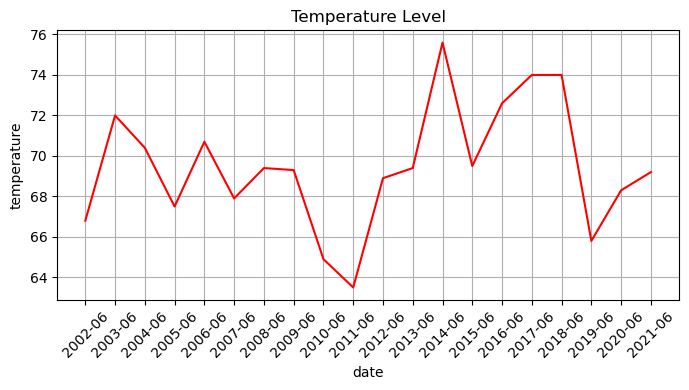

In [72]:
#Visual 1 

df = combined_df[pd.to_datetime(combined_df['date']).dt.month == 6]
plt.figure(figsize=(7,4))
plt.plot(df['date'], df['temp'], 'r')
plt.title('Temperature Level')
plt.ylabel('temperature')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.grid(True)
plt.show()


My Research questions is 
1)Identify the trend in temperature over the time of 22 years 

The current graph do not reflect the consistent trend(upward or downward) in temperature therefore need more datasets for meaningful results

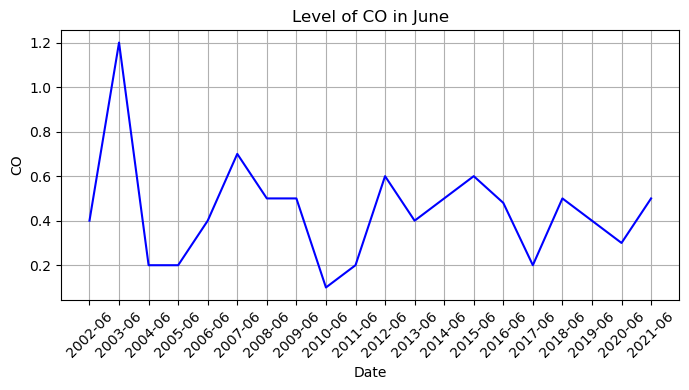

In [73]:
df = combined_df[pd.to_datetime(combined_df['date']).dt.month == 6]
plt.figure(figsize=(7, 4))
plt.plot(df['date'], df['co'], 'b')
plt.title('Level of CO in June')
plt.ylabel('CO')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

My Research questions is 
1)Identify the trend in CO over the time of 22 years 

The current graph do not reflect the consistent trend(upward or downward) in CO therefore need more datasets for meaningful results

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

The current graphs do not reflect the expected trends(upward or downward) in temperature and CO over the 22-year period. If i have more time , i will download and compare additional datasets from reliable sources to validate and refine the analysis.